<a href="https://colab.research.google.com/github/Jumaesca/Cliente-Servidor/blob/main/Actividad_2_B%C3%BAsqueda_y_sistemas_basados_en_reglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ruta encontrada: ['Portal americas', 'Patio bonito', 'Biblioteca tintal', 'Transversal 86', 'Banderas', 'Mandalay', 'Mundo aventura']
Distancia total: 145


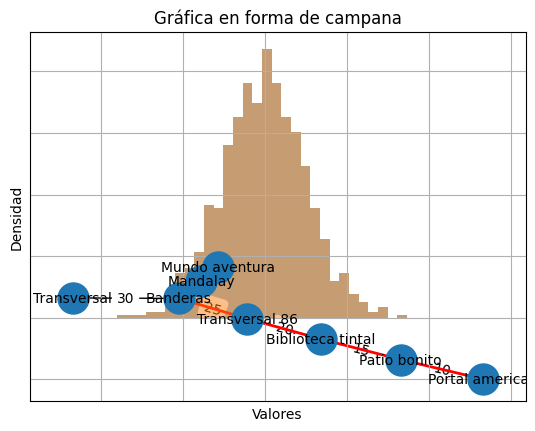

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Definir la base de conocimiento con reglas lógicas
base_conocimiento = {
    "conectado": {
        ("Portal americas", "Patio bonito"): 10,
        ("Patio bonito", "Biblioteca tintal"): 15,
        ("Biblioteca tintal", "Transversal 86"): 20,
        ("Transversal 86", "Banderas"): 25,
        ("Transversal", "Banderas"): 30,
        ("Banderas", "Mandalay"): 35,
        ("Mandalay", "Mundo aventura"): 40,
    }
}

# Crear el grafo
grafo = nx.Graph()

# Agregar las conexiones al grafo
for conexion, distancia in base_conocimiento["conectado"].items():
    estacion1, estacion2 = conexion
    grafo.add_edge(estacion1, estacion2, weight=distancia)


# Función para encontrar la mejor ruta
def encontrar_mejor_ruta(
    origen, destino, visitados=[], ruta_actual=[], distancia_actual=0
):
    # Agregar la estación actual a la ruta y marcarla como visitada
    ruta_actual.append(origen)
    visitados.append(origen)

    # Verificar si se ha llegado al destino
    if origen == destino:
        # Imprimir la ruta y la distancia total
        print("Ruta encontrada:", ruta_actual)
        print("Distancia total:", distancia_actual)
        return ruta_actual

    # Obtener todas las conexiones de la estación actual desde la base de conocimiento
    conexiones = base_conocimiento["conectado"].keys()

    # Inicializar la mejor ruta y distancia como nulas
    mejor_ruta = None
    mejor_distancia = float("inf")

    # Recorrer todas las conexiones de la estación actual
    for conexion in conexiones:
        if origen == conexion[0] and conexion[1] not in visitados:
            # Calcular la distancia acumulada para esta conexión
            distancia = distancia_actual + base_conocimiento["conectado"][conexion]

            # Realizar una llamada recursiva para encontrar la mejor ruta desde la conexión actual
            nueva_ruta = encontrar_mejor_ruta(
                conexion[1], destino, visitados[:], ruta_actual[:], distancia
            )

            # Actualizar la mejor ruta y distancia si se ha encontrado una ruta más corta
            if nueva_ruta and distancia < mejor_distancia:
                mejor_ruta = nueva_ruta
                mejor_distancia = distancia

    return mejor_ruta


ruta = encontrar_mejor_ruta("Portal americas", "Mundo aventura")

# Generar datos para la gráfica en forma de campana
mu, sigma = 0, 0.1  # Media y desviación estándar
datos = np.random.normal(mu, sigma, 1000)

# Visualizar la gráfica en forma de campana
plt.hist(datos, bins=30, density=True, alpha=0.5)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Gráfica en forma de campana")
plt.grid(True)

# Visualizar el grafo y la ruta encontrada
pos = nx.spring_layout(grafo)
nx.draw_networkx(grafo, pos, with_labels=True, node_size=500, font_size=10)
etiquetas = nx.get_edge_attributes(grafo, "weight")
nx.draw_networkx_edge_labels(grafo, pos, edge_labels=etiquetas)
ruta_aristas = [(ruta[i], ruta[i + 1]) for i in range(len(ruta) - 1)]
nx.draw_networkx_edges(grafo, pos, edgelist=ruta_aristas, edge_color="r", width=2)

# Visualizar la gráfica en forma de campana
plt.hist(datos, bins=30, density=True, alpha=0.5)
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Gráfica en forma de campana")
plt.grid(True)

plt.show()